# Central Limit Theorem explained in a simple example
By Josiah Sinclair

If a random variable "$s$" is the average of many other random variables "$x_1, x_2, ... x_i$" each sampled from a non-Gaussian distribution (e.g. a flat-topped distribution), what will the distribution of $s$ be?

To find out, let's start by imaging that my random variables $x_1, x_2, ... x_i$ are all sampled from the same distribution which is 0 everywhere except for being uniform in the interval {-1,1}. Below, I sample N times from this distribution and load the results into a data array $\vec{x} = \{x_1, x_2, ... x_i, ... x_{N}\}$. I then plot the elements of the elements of the array vs. index and show a histogram of $\{x_i\}$ which is distributed as expected. 

In [1]:
# First, import some useful Python packages
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import scipy as sp
from scipy import signal as sig
from scipy.optimize import curve_fit

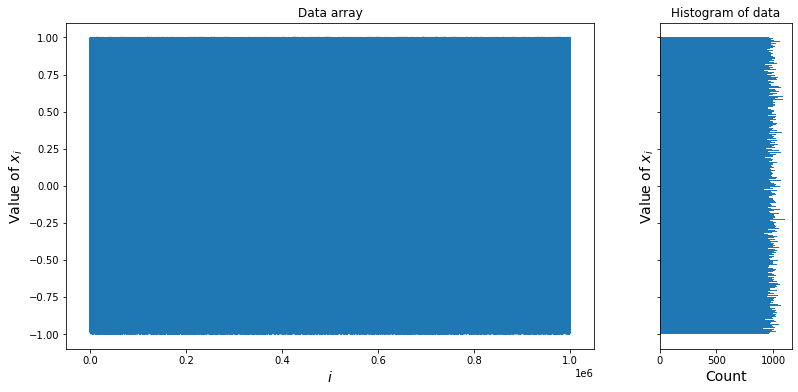

In [46]:
# First start by sampling from a uniform distribution
N = int(1e6)
s = np.random.uniform(-1,1,N)
index_s = np.arange(0,N,1)

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=[13,6], sharey=True, gridspec_kw={'width_ratios': [4, 1]})
axes[0].plot(index_s,s)
axes[0].set_xlabel("$i$", fontsize = 14)
axes[0].set_ylabel("Value of $x_i$", fontsize = 14)
axes[1].hist(s, bins=int(np.sqrt(N)), orientation='horizontal')
axes[1].set_xlabel("Count", fontsize = 14)
axes[1].set_ylabel("Value of $x_i$", fontsize = 14)
axes[1].set_title("Histogram of data")
axes[0].set_title("Data array")

plt.show()

I will now divide my dataset $\vec{s}$ containing $N$ values into $L$ smaller datasets of length $M$, where $M \times L = N$. The average of the $j$th smaller dataset will be $x_i$, and all the averages will define a new dataset $\vec{x} = \{x_1, x_2, ... x_j, ... x_L\}$ containing $L$ values. 

Mathematically, $x_j = \sum_{M \times j}^{M \times j + M}{s_{M \times j}}$, where $j$ is $0, 1, 2, ... L$.

What will be the distribution of $x_j$?

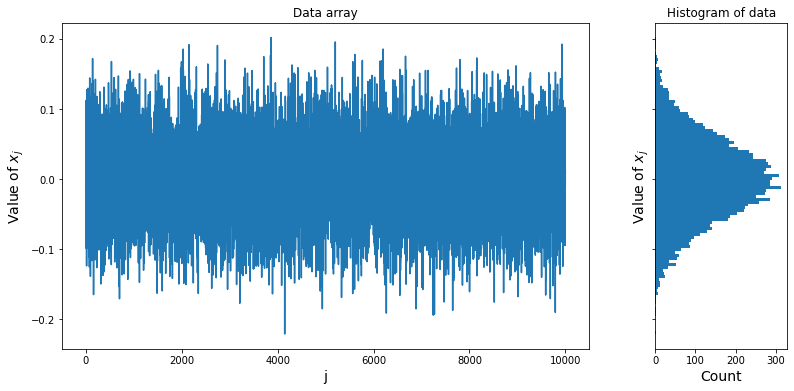

In [47]:
# Implement this by taking our length-N data array and reshaping it to be an array of size L by M. I can then average along the M axis to produce a new array of length L.
num_average = 100
len_of_x = int(N/num_average)
x = np.mean(np.reshape(s,(num_average,len_of_x)),0)
index_x = np.arange(0,len(x),1)
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=[13,6], sharey=True, gridspec_kw={'width_ratios': [4, 1]})
axes[0].plot(index_x,x)
axes[0].set_xlabel("j", fontsize = 14)
axes[0].set_ylabel("Value of $x_j$", fontsize = 14)
axes[1].hist(x, bins=int(np.sqrt(len_of_x)), orientation='horizontal')
axes[1].set_xlabel("Count", fontsize = 14)
axes[1].set_ylabel("Value of $x_j$", fontsize = 14)
axes[1].set_title("Histogram of data")
axes[0].set_title("Data array")
plt.show()

Despite the fact that $x_i$ was produced by averaging independent variables $s_i$ sampled from a uniform (or flat-topped distribution), its distribution is clearly Gaussian. Amazing!